# Lab Logistic Regression | ML 

## Predict the flower class!

#### Import libraries

In [1]:
import pandas as pd
import numpy as np

#### Import the dataset iris_dirty.csv from here into a Pandas dataframe.

In [2]:
data = pd.read_csv('iris_dirty.csv')
data

,5.1,3.5,1.4,2 mm,Iris-setosa
0,4.9,3.0,1.4,2 mm,Iris-setosa
1,4.7,3.2,1.3,2 mm,Iris-setosa
2,4.6,3.1,1.5,2 mm,Iris-setosa
3,5.0,3.6,1.4,2 mm,Iris-setosa
4,5.4,3.9,1.7,4 mm,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,23 mm,Iris-virginica
146,6.3,2.5,5.0,19 mm,Iris-virginica
147,6.5,3.0,5.2,20 mm,Iris-virginica
148,6.2,3.4,5.4,23 mm,Iris-virginica


 #### Use the column names sepal_length, sepal_width, petal_length, petal_width and class when you read in the data.

In [3]:
data.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,2 mm,Iris-setosa
1,4.7,3.2,1.3,2 mm,Iris-setosa
2,4.6,3.1,1.5,2 mm,Iris-setosa
3,5.0,3.6,1.4,2 mm,Iris-setosa
4,5.4,3.9,1.7,4 mm,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,23 mm,Iris-virginica
146,6.3,2.5,5.0,19 mm,Iris-virginica
147,6.5,3.0,5.2,20 mm,Iris-virginica
148,6.2,3.4,5.4,23 mm,Iris-virginica


#### Explore the data with Pandas 

In [4]:
data.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length petal_width           class
0             4.9          3.0           1.4        2 mm     Iris-setosa
1             4.7          3.2           1.3        2 mm     Iris-setosa
2             4.6          3.1           1.5        2 mm     Iris-setosa
3             5.0          3.6           1.4        2 mm     Iris-setosa
4             5.4          3.9           1.7        4 mm     Iris-setosa
..            ...          ...           ...         ...             ...
145           6.7          3.0           5.2       23 mm  Iris-virginica
146           6.3          2.5           5.0       19 mm  Iris-virginica
147           6.5          3.0           5.2       20 mm  Iris-virginica
148           6.2          3.4           5.4       23 mm  Iris-virginica
149           5.9          3.0           5.1       18 mm  Iris-virginica

[150 rows x 5 columns]>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    object 
 4   class         150 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length
count,150.000000,149.000000,150.000000
mean,6.204000,3.054362,3.780667
std,4.337876,0.432698,1.755364
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,58.000000,4.400000,6.900000


#### Check missing values/Substitute with the column mean

In [7]:
data.isna().sum()

sepal_length    0
sepal_width     1
petal_length    0
petal_width     0
class           0
dtype: int64

In [8]:
#find the 'sepal_width' mean
mean_sepal_width = data['sepal_width'].mean()

In [9]:
#replace NaN with the mean
data['sepal_width'].fillna(value=mean_sepal_width, inplace=True)

In [10]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

#### Check duplicates

In [11]:
data.shape

(150, 5)

In [12]:
data = data.drop_duplicates()
data.shape

(147, 5)

#### Check data types

In [13]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width      object
class            object
dtype: object

In [14]:
#We see that petal_width should be numerical too, let's fix it: get only numbers, convert to float and also uniform the unit (all the rest are in cms)
data['petal_width'],data['petal_width_mm'] = data['petal_width'].str.split(' ', 1).str

<ipython-input-14-1ba068b36ccf>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['petal_width'],data['petal_width_mm'] = data['petal_width'].str.split(' ', 1).str
<ipython-input-14-1ba068b36ccf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['petal_width'],data['petal_width_mm'] = data['petal_width'].str.split(' ', 1).str


In [15]:
data

,sepal_length,sepal_width,petal_length,petal_width,class,petal_width_mm
0,4.9,3.0,1.4,2,Iris-setosa,mm
1,4.7,3.2,1.3,2,Iris-setosa,mm
2,4.6,3.1,1.5,2,Iris-setosa,mm
3,5.0,3.6,1.4,2,Iris-setosa,mm
4,5.4,3.9,1.7,4,Iris-setosa,mm
...,...,...,...,...,...,...
145,6.7,3.0,5.2,23,Iris-virginica,mm
146,6.3,2.5,5.0,19,Iris-virginica,mm
147,6.5,3.0,5.2,20,Iris-virginica,mm
148,6.2,3.4,5.4,23,Iris-virginica,mm


In [16]:
data.drop(['petal_width_mm'],axis = 1, inplace = True)
data

C:\Users\maria\.conda\envs\myenv\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,2,Iris-setosa
1,4.7,3.2,1.3,2,Iris-setosa
2,4.6,3.1,1.5,2,Iris-setosa
3,5.0,3.6,1.4,2,Iris-setosa
4,5.4,3.9,1.7,4,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,23,Iris-virginica
146,6.3,2.5,5.0,19,Iris-virginica
147,6.5,3.0,5.2,20,Iris-virginica
148,6.2,3.4,5.4,23,Iris-virginica


In [17]:
data['petal_width'] = data['petal_width'].astype(float)
data.dtypes

<ipython-input-17-de4dd7f1ea05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['petal_width'] = data['petal_width'].astype(float)


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [18]:
data['petal_width'] = data['petal_width']/10
data

<ipython-input-18-5a1f5cc628a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['petal_width'] = data['petal_width']/10


,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Clean categorical column: 'class'

In [19]:
data['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        46
Iris-setsoa         1
Name: class, dtype: int64

In [20]:
#Iris-setosa and iris-setsoa is the same class (spelling error) so let's fix it
def clean_class(x):
    if 'Iris-set' in x:
        return 'Iris-setosa'
    else:
        return x

In [21]:
data['class'] = data['class'].apply(clean_class)
data['class'].value_counts()

<ipython-input-21-f6e33874be79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = data['class'].apply(clean_class)


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        47
Name: class, dtype: int64

#### Check for outliers

C:\Users\maria\.conda\envs\myenv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


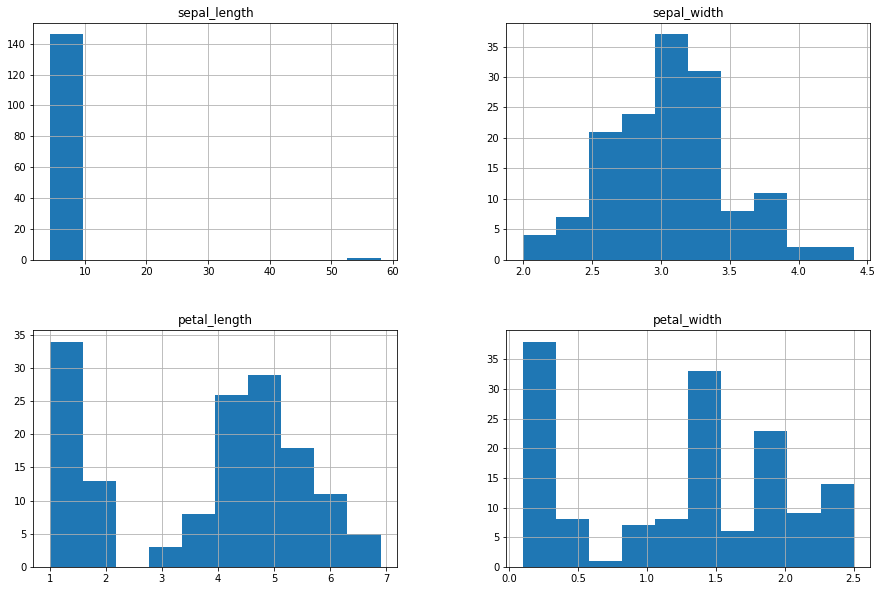

In [22]:
data.hist(figsize = (15,10));

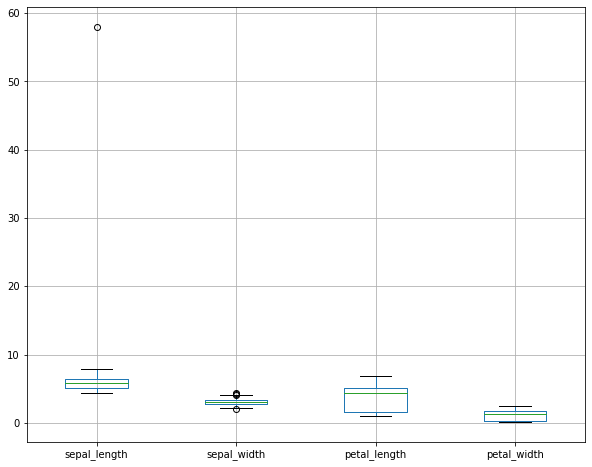

In [23]:
data.boxplot(figsize=(10,8));

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

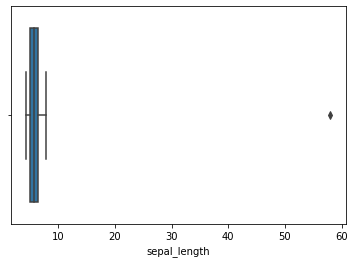

In [25]:
sns.boxplot(x=data['sepal_length']);

In [26]:
#remove outliers
iqr = np.percentile(data['sepal_length'],75) - np.percentile(data['sepal_length'],25)
upper_limit = np.percentile(data['sepal_length'],75) + 1.5*iqr
lower_limit = np.percentile(data['sepal_length'],25) - 1.5*iqr
data = data[(data['sepal_length']>lower_limit) & (data['sepal_length']<upper_limit)]

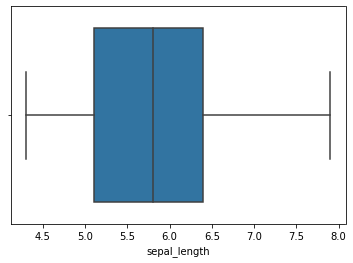

In [27]:
sns.boxplot(x=data['sepal_length']);

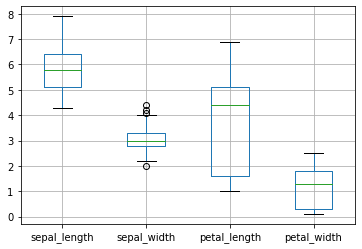

In [29]:
data.boxplot();

#### Plot a correlation matrix with a heatmap between the numeric features

In [34]:
numerical = data._get_numeric_data()

In [36]:
corr_matrix = numerical.corr()

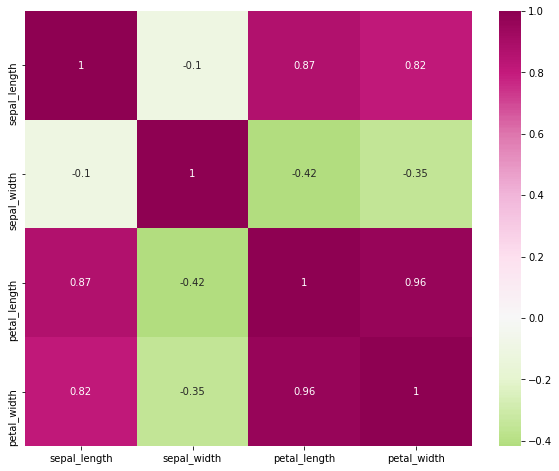

In [47]:
fig, ax =plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='PiYG_r', center=0, annot=True);

#### Preproccessing

In [50]:
#Normalization
from sklearn.preprocessing import Normalizer

X = data.select_dtypes(include = np.number)
X.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width
0             4.9          3.0           1.4          0.2
1             4.7          3.2           1.3          0.2
2             4.6          3.1           1.5          0.2
3             5.0          3.6           1.4          0.2
4             5.4          3.9           1.7          0.4
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[146 rows x 4 columns]>

In [51]:
transformer = Normalizer()
transformer.fit(X)
x_normalized = transformer.transform(X)

In [55]:
#x_normalized is an array and looks ugly so we put it in a df
x = pd.DataFrame(x_normalized, columns=X.columns)
x

,sepal_length,sepal_width,petal_length,petal_width
0,0.828133,0.507020,0.236609,0.033801
1,0.805333,0.548312,0.222752,0.034269
2,0.800030,0.539151,0.260879,0.034784
3,0.790965,0.569495,0.221470,0.031639
4,0.784175,0.566349,0.246870,0.058087
...,...,...,...,...
141,0.721557,0.323085,0.560015,0.247699
142,0.729654,0.289545,0.579090,0.220054
143,0.716539,0.330710,0.573231,0.220474
144,0.674671,0.369981,0.587616,0.250281


In [57]:
y = data['class']

#### T-T split and model

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.3, random_state=40)

In [91]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400, multi_class='ovr').fit(X_train, y_train)
y_pred=classification.predict(X_test)

#### Calculate the predicted labels, the accuracy score of y_test and y_predicted and plot a confusion matrix of the two.

In [93]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

1.0

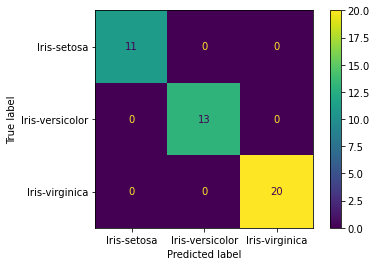

In [90]:
#Confusion matrix 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()